# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- FDR를 통한 여러 종목 수익률 비교
- 네이버 금융 개별종목 수집
- plotly로 일별 시세 시각화

]

## FDR를 통한 여러 종목 수익률 비교

* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


### 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [ ]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [ ]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

In [ ]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG전자': '066570',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

In [ ]:
# stock_dict 변수의 타입을 봅니다.
type(stock_dict)

In [ ]:
# dict 는 key:value 구조 입니다. key만 봅니다.
stock_dict.keys()

In [ ]:
# dict 는 key:value 구조 입니다. value만 봅니다.
stock_dict.values()

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [ ]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2020", "2021")['Close']
    item_list.append(close)

In [ ]:
len(item_list)

In [ ]:
item_code

In [ ]:
fdr.DataReader(item_code, "2020", "2021")['Close']

In [ ]:
type(fdr.DataReader(item_code)['Close'])

In [ ]:
item_list

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)
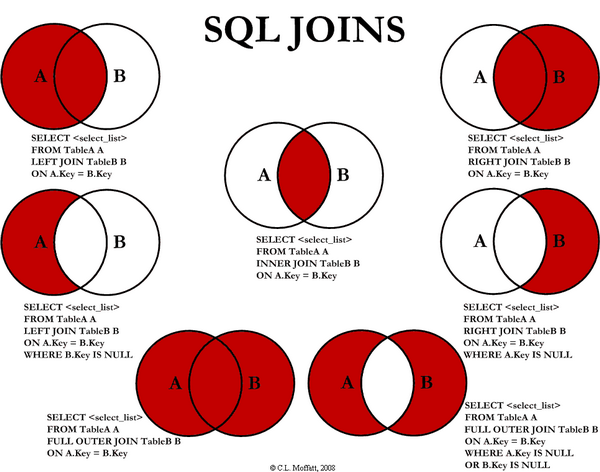

In [ ]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list, axis=1)
df

In [ ]:
df.columns = stock_dict.keys()
df

### 시각화를 위한 폰트 설정

In [ ]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
import matplotlib
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [ ]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

In [ ]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
### Linux
# import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = 'NanumGothic'

In [ ]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

In [ ]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(16, 8))

In [ ]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자", "LG전자"]].plot(figsize=(16, 4))

## 2축 그래프 사용하기

In [ ]:
# secondary_y를 사용해 2축 그래프 그리기
df[["삼성전자", "LG전자"]].plot(secondary_y="LG전자", figsize=(16, 4))

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)
        
참고 : https://soo-jjeong.tistory.com/123

In [ ]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[['LG전자', '삼성전자']]
df2.head()

In [ ]:
df2.iloc[0]

In [ ]:
df2 / df2.iloc[0] - 1

In [ ]:
df_plot = df2 / df2.iloc[0] - 1
df_plot

In [ ]:
# 수익률 시각화 하기
df_plot.plot(figsize=(16, 4))

## pyplot의 subplots 로 서브플롯 그리기

In [ ]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
df[["LG전자", "삼성전자"]].plot(secondary_y="LG전자", ax=axes[0], title="2축 그래프")
df_plot.plot(ax=axes[1], title="수익률 그래프")

In [ ]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
h = df_plot.hist(figsize=(15, 4), bins=20)

In [ ]:
df_plot.describe()

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [ ]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = df / df.iloc[0] - 1
df_norm

### 전체 종목의 수익률 시각화

In [ ]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(17, 8))

In [ ]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

In [ ]:
# 수익률에 대한 히스토그램 그리기
h = df_norm.hist(figsize=(12, 12), bins=20)

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [ ]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew()

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 0에 가까우면 산포도가 정규분포에 가깝다. 
    * 0보다 작을 경우에는(K<0) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 0보다 큰 양수이면(K>0) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.


* 출처 : [첨도 - 피셔(0) vs 피어슨(3)](https://mizykk.tistory.com/73)

In [ ]:
# pandas.DataFrame.kurt
# DataFrame.kurt(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)[source]
# Return unbiased kurtosis over requested axis.
# Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). Normalized by N-1.

# kurt 로 첨도를 구합니다.
df_norm.kurt()